In [165]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = "mouse_drug_data.csv"
clinical_trial_data = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_drug_data = pd.read_csv(mouse_drug_data)
clinical_trial_data = pd.read_csv(clinical_trial_data)

# Combine the data into a single dataset

combined_study_data = pd.merge(mouse_drug_data, clinical_trial_data, on="Mouse ID")

# Display the data table for preview

combined_study_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [166]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint by splitting up the data into groups based upon 'Drug' and 'Timepoint'
# Filter the DataFrame down only to those columns to chart
Mean_Tumer_Volume_data_grouped_by_drug_and_time_point = combined_study_data.groupby(['Drug','Timepoint'])

# Convert to DataFrame

Mean_Tumor_Volume_data_grouped_by_drug_and_time_point_df = Mean_Tumer_Volume_data_grouped_by_drug_and_time_point[["Tumor Volume (mm3)"]].mean().reset_index()

# Preview DataFrame

Mean_Tumor_Volume_data_grouped_by_drug_and_time_point_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [167]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

SEM_Tumer_Volume_data_grouped_by_drug_and_time_point = combined_study_data.groupby(['Drug','Timepoint'])

# Convert to DataFrame

SEM_Tumor_data_grouped_by_drug_and_time_point_df = SEM_Tumer_Volume_data_grouped_by_drug_and_time_point[["Tumor Volume (mm3)"]].sem().reset_index()

# Preview DataFrame

SEM_Tumor_data_grouped_by_drug_and_time_point_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [168]:
# Minor Data Munging to Re-Format the Tumor Volume Mean Data Frames
Reformat_Mean_Tumor_Volume_data_grouped_by_drug_and_time_point_df = pd.pivot_table(Mean_Tumor_Volume_data_grouped_by_drug_and_time_point_df, index=['Timepoint'], columns=['Drug']) 

# Preview that Reformatting worked
Reformat_Mean_Tumor_Volume_data_grouped_by_drug_and_time_point_df = Reformat_Mean_Tumor_Volume_data_grouped_by_drug_and_time_point_df.loc[ : , 'Tumor Volume (mm3)']
Reformat_Mean_Tumor_Volume_data_grouped_by_drug_and_time_point_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [169]:
# Minor Data Munging to Re-Format the Tumor Volume SEM Data Frames
Reformat_SEM_Tumor_data_grouped_by_drug_and_time_point_df = pd.pivot_table(SEM_Tumor_data_grouped_by_drug_and_time_point_df, index=['Timepoint'], columns=['Drug']) 

# Preview that Reformatting worked
Reformat_SEM_Tumor_data_grouped_by_drug_and_time_point_df = Reformat_SEM_Tumor_data_grouped_by_drug_and_time_point_df.loc[ : , 'Tumor Volume (mm3)']
Reformat_SEM_Tumor_data_grouped_by_drug_and_time_point_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


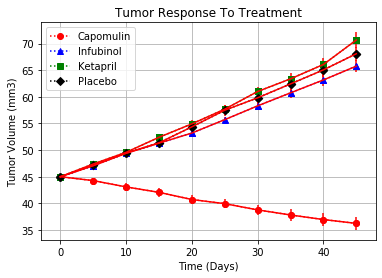

<Figure size 432x288 with 0 Axes>

In [171]:
# Obtain a list of the mean and SEM Tumor Volume for each drug

Capomulin_Tumor_Volume_Means = np.array(Reformat_Mean_Tumor_Volume_data_grouped_by_drug_and_time_point_df[["Capomulin"]])
Ceftamin_Tumor_Volume_Means = np.array(Reformat_Mean_Tumor_Volume_data_grouped_by_drug_and_time_point_df[["Ceftamin"]])
Infubinol_Tumor_Volume_Means = np.array(Reformat_Mean_Tumor_Volume_data_grouped_by_drug_and_time_point_df[["Infubinol"]])
Ketapril_Tumor_Volume_Means = np.array(Reformat_Mean_Tumor_Volume_data_grouped_by_drug_and_time_point_df[["Ketapril"]])
Naftisol_Tumor_Volume_Means = np.array(Reformat_Mean_Tumor_Volume_data_grouped_by_drug_and_time_point_df[["Naftisol"]])
Placebo_Tumor_Volume_Means = np.array(Reformat_Mean_Tumor_Volume_data_grouped_by_drug_and_time_point_df[["Placebo"]])
Propriva_Tumor_Volume_Means = np.array(Reformat_Mean_Tumor_Volume_data_grouped_by_drug_and_time_point_df[["Propriva"]])
Ramicane_Tumor_Volume_Means = np.array(Reformat_Mean_Tumor_Volume_data_grouped_by_drug_and_time_point_df[["Ramicane"]])
Stelasyn_Tumor_Volume_Means = np.array(Reformat_Mean_Tumor_Volume_data_grouped_by_drug_and_time_point_df[["Stelasyn"]])
Zoniferol_Tumor_Volume_Means = np.array(Reformat_Mean_Tumor_Volume_data_grouped_by_drug_and_time_point_df[["Zoniferol"]])

Capomulin_Tumor_Volume_SEM = np.array(Reformat_SEM_Tumor_data_grouped_by_drug_and_time_point_df[["Capomulin"]])
Ceftamin_Tumor_Volume_SEM = np.array(Reformat_SEM_Tumor_data_grouped_by_drug_and_time_point_df[["Ceftamin"]])
Infubinol_Tumor_Volume_SEM = np.array(Reformat_SEM_Tumor_data_grouped_by_drug_and_time_point_df[["Infubinol"]])
Ketapril_Tumor_Volume_SEM = np.array(Reformat_SEM_Tumor_data_grouped_by_drug_and_time_point_df[["Ketapril"]])
Naftisol_Tumor_Volume_SEM = np.array(Reformat_SEM_Tumor_data_grouped_by_drug_and_time_point_df[["Naftisol"]])
Placebo_Tumor_Volume_SEM = np.array(Reformat_SEM_Tumor_data_grouped_by_drug_and_time_point_df[["Placebo"]])
Propriva_Tumor_Volume_SEM = np.array(Reformat_SEM_Tumor_data_grouped_by_drug_and_time_point_df[["Propriva"]])
Ramicane_Tumor_Volume_SEM = np.array(Reformat_SEM_Tumor_data_grouped_by_drug_and_time_point_df[["Ramicane"]])
Stelasyn_Tumor_Volume_SEM = np.array(Reformat_SEM_Tumor_data_grouped_by_drug_and_time_point_df[["Stelasyn"]])
Zoniferol_Tumor_Volume_SEM = np.array(Reformat_SEM_Tumor_data_grouped_by_drug_and_time_point_df[["Zoniferol"]])

# Define the X Axis

x_axis = np.arange(0, 50, 5)

# Generate the Plot (with Error Bars): Objective is to analyze the data to show how four of these treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare

plt.scatter(x_axis, Capomulin_Tumor_Volume_Means, marker='o', color='red')
plt.plot(x_axis, Capomulin_Tumor_Volume_Means, 'r:o', label='Capomulin')
plt.errorbar(x_axis, Capomulin_Tumor_Volume_Means, yerr=Capomulin_Tumor_Volume_SEM, color='red')

plt.scatter(x_axis, Infubinol_Tumor_Volume_Means, marker='^', color='blue')
plt.plot(x_axis, Infubinol_Tumor_Volume_Means, 'b:^', label='Infubinol')
plt.errorbar(x_axis, Infubinol_Tumor_Volume_Means, yerr=Infubinol_Tumor_Volume_SEM, color='red')

plt.scatter(x_axis, Ketapril_Tumor_Volume_Means, marker='s', color='green')
plt.plot(x_axis,Ketapril_Tumor_Volume_Means, 'g:s', label='Ketapril')
plt.errorbar(x_axis, Ketapril_Tumor_Volume_Means, yerr=Ketapril_Tumor_Volume_SEM, color='red')

plt.scatter(x_axis, Placebo_Tumor_Volume_Means, marker='D', color='black')
plt.plot(x_axis, Placebo_Tumor_Volume_Means, 'k:D', label='Placebo')
plt.errorbar(x_axis, Placebo_Tumor_Volume_Means, yerr=Placebo_Tumor_Volume_SEM, color='red')

plt.title("Tumor Response To Treatment")
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.grid()

# Show the Figure
plt.show()

# Save the Figure
plt.savefig('tumor-response-to-treatment.png')



In [172]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [173]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Filter the DataFrame down only to those columns to chart
Mean_Metastatic_Sites_data_grouped_by_drug_and_time_point = combined_study_data.groupby(['Drug','Timepoint'])

# Convert to DataFrame

Mean_Metastatic_Sites_data_grouped_by_drug_and_time_point_df = Mean_Metastatic_Sites_data_grouped_by_drug_and_time_point[["Metastatic Sites"]].mean().reset_index()

# Preview DataFrame

Mean_Metastatic_Sites_data_grouped_by_drug_and_time_point_df.head()



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [174]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

SEM_Metastatic_Sites_data_grouped_by_drug_and_time_point = combined_study_data.groupby(['Drug','Timepoint'])

# Convert to DataFrame

SEM_Metastatic_Sites_data_grouped_by_drug_and_time_point_df = SEM_Metastatic_Sites_data_grouped_by_drug_and_time_point[["Metastatic Sites"]].sem().reset_index()

# Preview DataFrame

SEM_Metastatic_Sites_data_grouped_by_drug_and_time_point_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [175]:
# Minor Data Munging to Re-Format the Mean Metastic Sites Data Frames
Reformat_Mean_Metastatic_Sites_data_grouped_by_drug_and_time_point_df = pd.pivot_table(Mean_Metastatic_Sites_data_grouped_by_drug_and_time_point_df, index=['Timepoint'], columns=['Drug']) 

# Preview that Reformatting worked
Reformat_Mean_Metastatic_Sites_data_grouped_by_drug_and_time_point_df = Reformat_Mean_Metastatic_Sites_data_grouped_by_drug_and_time_point_df.loc[ : , 'Metastatic Sites']
Reformat_Mean_Metastatic_Sites_data_grouped_by_drug_and_time_point_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [176]:
# Minor Data Munging to Re-Format the Metastatic Sites SEM Data Frames
Reformat_SEM_Metastatic_Sites_data_grouped_by_drug_and_time_point_df = pd.pivot_table(SEM_Metastatic_Sites_data_grouped_by_drug_and_time_point_df, index=['Timepoint'], columns=['Drug']) 

# Preview that Reformatting worked
Reformat_SEM_Metastatic_Sites_data_grouped_by_drug_and_time_point_df = Reformat_SEM_Metastatic_Sites_data_grouped_by_drug_and_time_point_df.loc[ : , 'Metastatic Sites']
Reformat_SEM_Metastatic_Sites_data_grouped_by_drug_and_time_point_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


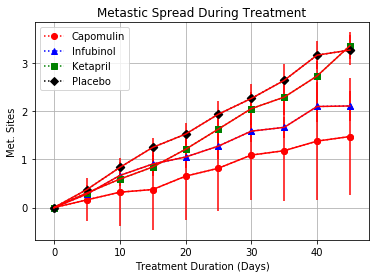

<Figure size 432x288 with 0 Axes>

In [178]:
# Obtain a list of the mean and SEM Metastatic Sites for each drug

Capomulin_Metastatic_Sites_Means = np.array(Reformat_Mean_Metastatic_Sites_data_grouped_by_drug_and_time_point_df[["Capomulin"]])
Ceftamin_Metastatic_Sites_Means = np.array(Reformat_Mean_Metastatic_Sites_data_grouped_by_drug_and_time_point_df[["Ceftamin"]])
Infubinol_Metastatic_Sites_Means = np.array(Reformat_Mean_Metastatic_Sites_data_grouped_by_drug_and_time_point_df[["Infubinol"]])
Ketapril_Metastatic_Sites_Means = np.array(Reformat_Mean_Metastatic_Sites_data_grouped_by_drug_and_time_point_df[["Ketapril"]])
Naftisol_Metastatic_Sites_Means = np.array(Reformat_Mean_Metastatic_Sites_data_grouped_by_drug_and_time_point_df[["Naftisol"]])
Placebo_Metastatic_Sites_Means = np.array(Reformat_Mean_Metastatic_Sites_data_grouped_by_drug_and_time_point_df[["Placebo"]])
Propriva_Metastatic_Sites_Means = np.array(Reformat_Mean_Metastatic_Sites_data_grouped_by_drug_and_time_point_df[["Propriva"]])
Ramicane_Metastatic_Sites_Means = np.array(Reformat_Mean_Metastatic_Sites_data_grouped_by_drug_and_time_point_df[["Ramicane"]])
Stelasyn_Metastatic_Sites_Means = np.array(Reformat_Mean_Metastatic_Sites_data_grouped_by_drug_and_time_point_df[["Stelasyn"]])
Zoniferol_Metastatic_Sites_Means = np.array(Reformat_Mean_Metastatic_Sites_data_grouped_by_drug_and_time_point_df[["Zoniferol"]])

Capomulin_Metastatic_Sites_SEM = np.array(Reformat_SEM_Metastatic_Sites_data_grouped_by_drug_and_time_point_df[["Capomulin"]])
Ceftamin_Metastatic_Sites_SEM = np.array(Reformat_SEM_Metastatic_Sites_data_grouped_by_drug_and_time_point_df[["Ceftamin"]])
Infubinol_Metastatic_Sites_SEM = np.array(Reformat_SEM_Metastatic_Sites_data_grouped_by_drug_and_time_point_df[["Infubinol"]])
Ketapril_Metastatic_Sites_SEM = np.array(Reformat_SEM_Metastatic_Sites_data_grouped_by_drug_and_time_point_df[["Ketapril"]])
Naftisol_Metastatic_Sites_SEM = np.array(Reformat_SEM_Metastatic_Sites_data_grouped_by_drug_and_time_point_df[["Naftisol"]])
Placebo_Metastatic_Sites_SEM = np.array(Reformat_SEM_Metastatic_Sites_data_grouped_by_drug_and_time_point_df[["Placebo"]])
Propriva_Metastatic_Sites_SEM = np.array(Reformat_SEM_Metastatic_Sites_data_grouped_by_drug_and_time_point_df[["Propriva"]])
Ramicane_Metastatic_Sites_SEM = np.array(Reformat_SEM_Metastatic_Sites_data_grouped_by_drug_and_time_point_df[["Ramicane"]])
Stelasyn_Metastatic_Sites_SEM = np.array(Reformat_SEM_Metastatic_Sites_data_grouped_by_drug_and_time_point_df[["Stelasyn"]])
Zoniferol_Metastatic_Sites_SEM = np.array(Reformat_SEM_Metastatic_Sites_data_grouped_by_drug_and_time_point_df[["Zoniferol"]])

# Define the X Axis

x_axis = np.arange(0, 50, 5)

# Generate the Plot (with Error Bars): Objective is to analyze the data to show how four of these treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare

plt.scatter(x_axis, Capomulin_Metastatic_Sites_Means, marker='o', color='red')
plt.plot(x_axis, Capomulin_Metastatic_Sites_Means, 'r:o', label='Capomulin')
plt.errorbar(x_axis, Capomulin_Metastatic_Sites_Means, yerr=Capomulin_SEM, color='red')

plt.scatter(x_axis, Infubinol_Metastatic_Sites_Means, marker='^', color='blue')
plt.plot(x_axis, Infubinol_Metastatic_Sites_Means, 'b:^', label='Infubinol')
plt.errorbar(x_axis, Infubinol_Metastatic_Sites_Means, yerr=Infubinol_Metastatic_Sites_SEM, color='red')

plt.scatter(x_axis, Ketapril_Metastatic_Sites_Means, marker='s', color='green')
plt.plot(x_axis,Ketapril_Metastatic_Sites_Means, 'g:s', label='Ketapril')
plt.errorbar(x_axis, Ketapril_Metastatic_Sites_Means, yerr=Ketapril_Metastatic_Sites_SEM, color='red')

plt.scatter(x_axis, Placebo_Metastatic_Sites_Means, marker='D', color='black')
plt.plot(x_axis, Placebo_Metastatic_Sites_Means, 'k:D', label='Placebo')
plt.errorbar(x_axis, Placebo_Metastatic_Sites_Means, yerr=Placebo_Metastatic_Sites_SEM, color='red')

plt.title("Metastic Spread During Treatment")
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.legend()
plt.grid()

# Show the Figure
plt.show()

# Save the Figure
plt.savefig('metastic-spread-during-treatment.png')



## Survival Rates

In [179]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

Count_of_Mice_data_grouped_by_drug_and_time_point = combined_study_data.groupby(['Drug','Timepoint'])

# Convert to DataFrame

Count_of_Mice_data_grouped_by_drug_and_time_point_df = Count_of_Mice_data_grouped_by_drug_and_time_point[["Mouse ID"]].count().reset_index()

# Preview DataFrame
Count_of_Mice_data_grouped_by_drug_and_time_point_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [180]:
# Minor Data Munging to Re-Format the Count of Mice Data Frames
Reformat_Count_of_Mice_data_grouped_by_drug_and_time_point_df = pd.pivot_table(Count_of_Mice_data_grouped_by_drug_and_time_point_df, index=['Timepoint'], columns=['Drug']) 

# Preview that Reformatting worked
Reformat_Count_of_Mice_data_grouped_by_drug_and_time_point_df = Reformat_Count_of_Mice_data_grouped_by_drug_and_time_point_df.loc[ : , 'Mouse ID']
Reformat_Count_of_Mice_data_grouped_by_drug_and_time_point_df



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


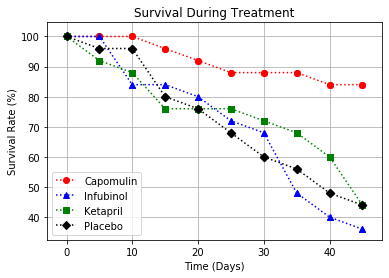

FileNotFoundError: [Errno 2] No such file or directory: 'Images/survival.png'

<Figure size 432x288 with 0 Axes>

In [181]:
# Obtain a list of the number of mice alive for each drug

Capomulin_survival_count = np.array(Reformat_Count_of_Mice_data_grouped_by_drug_and_time_point_df[["Capomulin"]])
Ceftamin_survival_count = np.array(Reformat_Count_of_Mice_data_grouped_by_drug_and_time_point_df[["Ceftamin"]])
Infubinol_survival_count = np.array(Reformat_Count_of_Mice_data_grouped_by_drug_and_time_point_df[["Infubinol"]])
Ketapril_survival_count = np.array(Reformat_Count_of_Mice_data_grouped_by_drug_and_time_point_df[["Ketapril"]])
Naftisol_survival_count = np.array(Reformat_Count_of_Mice_data_grouped_by_drug_and_time_point_df[["Naftisol"]])
Placebo_survival_count = np.array(Reformat_Count_of_Mice_data_grouped_by_drug_and_time_point_df[["Placebo"]])
Propriva_survival_count = np.array(Reformat_Count_of_Mice_data_grouped_by_drug_and_time_point_df[["Propriva"]])
Ramicane_survival_count = np.array(Reformat_Count_of_Mice_data_grouped_by_drug_and_time_point_df[["Ramicane"]])
Stelasyn_survival_count = np.array(Reformat_Count_of_Mice_data_grouped_by_drug_and_time_point_df[["Stelasyn"]])
Zoniferol_survival_count = np.array(Reformat_Count_of_Mice_data_grouped_by_drug_and_time_point_df[["Zoniferol"]])

# Obtain a list of the pct of mice alive for each drug
# A calculation can be performed on the Series and added into DataFrames as a new column

Capomulin_survival_pct = np.array(Reformat_Count_of_Mice_data_grouped_by_drug_and_time_point_df[["Capomulin"]])/25*100
Ceftamin_survival_pct = np.array(Reformat_Count_of_Mice_data_grouped_by_drug_and_time_point_df[["Ceftamin"]])/25*100
Infubinol_survival_pct = np.array(Reformat_Count_of_Mice_data_grouped_by_drug_and_time_point_df[["Infubinol"]])/25*100
Ketapril_survival_pct = np.array(Reformat_Count_of_Mice_data_grouped_by_drug_and_time_point_df[["Ketapril"]])/25*100
Naftisol_survival_pct = np.array(Reformat_Count_of_Mice_data_grouped_by_drug_and_time_point_df[["Naftisol"]])/25*100
Placebo_survival_pct = np.array(Reformat_Count_of_Mice_data_grouped_by_drug_and_time_point_df[["Placebo"]])/25*100
Propriva_survival_pct = np.array(Reformat_Count_of_Mice_data_grouped_by_drug_and_time_point_df[["Propriva"]])/25*100
Ramicane_survival_pct = np.array(Reformat_Count_of_Mice_data_grouped_by_drug_and_time_point_df[["Ramicane"]])/25*100
Stelasyn_survival_pct = np.array(Reformat_Count_of_Mice_data_grouped_by_drug_and_time_point_df[["Stelasyn"]])/25*100
Zoniferol_survival_pct = np.array(Reformat_Count_of_Mice_data_grouped_by_drug_and_time_point_df[["Zoniferol"]])/25*100

# Define the X Axis

x_axis = np.arange(0, 50, 5)

# Generate the Plot (with Error Bars): Objective is to analyze the data to show how four of these treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare

plt.scatter(x_axis, Capomulin_survival_pct, marker='o', color='red')
plt.plot(x_axis, Capomulin_survival_pct, 'r:o', label='Capomulin')

plt.scatter(x_axis, Infubinol_survival_pct, marker='^', color='blue')
plt.plot(x_axis, Infubinol_survival_pct, 'b:^', label='Infubinol')

plt.scatter(x_axis, Ketapril_survival_pct, marker='s', color='green')
plt.plot(x_axis,Ketapril_survival_pct, 'g:s', label='Ketapril')

plt.scatter(x_axis, Placebo_survival_pct, marker='D', color='black')
plt.plot(x_axis, Placebo_survival_pct, 'k:D', label='Placebo')

plt.title("Survival During Treatment")
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.legend()
plt.grid()

# Show the Figure
plt.show()

# Save the Figure
plt.savefig('Images/survival.png')



![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [182]:
# Calculate the percent changes for each drug

Capomulin_Tumor_Volume_Means_PctChange = (Capomulin_Tumor_Volume_Means[9]-Capomulin_Tumor_Volume_Means[0])/Capomulin_Tumor_Volume_Means[0]
Ceftamin_Tumor_Volume_Means_PctChange = (Ceftamin_Tumor_Volume_Means[9]-Ceftamin_Tumor_Volume_Means[0])/Ceftamin_Tumor_Volume_Means[0]
Infubinol_Tumor_Volume_Means_PctChange = (Infubinol_Tumor_Volume_Means[9]-Infubinol_Tumor_Volume_Means[0])/Infubinol_Tumor_Volume_Means[0]
Ketapril_Tumor_Volume_Means_PctChange = (Ketapril_Tumor_Volume_Means[9]-Ketapril_Tumor_Volume_Means[0])/Ketapril_Tumor_Volume_Means[0]
Naftisol_Tumor_Volume_Means_PctChange = (Naftisol_Tumor_Volume_Means[9]-Naftisol_Tumor_Volume_Means[0])/Naftisol_Tumor_Volume_Means[0]
Placebo_Tumor_Volume_Means_PctChange = (Placebo_Tumor_Volume_Means[9]-Placebo_Tumor_Volume_Means[0])/Placebo_Tumor_Volume_Means[0]
Propriva_Tumor_Volume_Means_PctChange = (Propriva_Tumor_Volume_Means[9]-Propriva_Tumor_Volume_Means[0])/Propriva_Tumor_Volume_Means[0]
Ramicane_Tumor_Volume_Means_PctChange = (Ramicane_Tumor_Volume_Means[9]-Ramicane_Tumor_Volume_Means[0])/Ramicane_Tumor_Volume_Means[0]
Stelasyn_Tumor_Volume_Means_PctChange = (Stelasyn_Tumor_Volume_Means[9]-Stelasyn_Tumor_Volume_Means[0])/Stelasyn_Tumor_Volume_Means[0]
Zoniferol_Tumor_Volume_Means_PctChange = (Zoniferol_Tumor_Volume_Means[9]-Zoniferol_Tumor_Volume_Means[0])/Zoniferol_Tumor_Volume_Means[0]


# Display the data to confirm

Tumor_Volume_Means_PctChange_list = [Capomulin_Tumor_Volume_Means_PctChange, Ceftamin_Tumor_Volume_Means_PctChange, 
                    Infubinol_Tumor_Volume_Means_PctChange, Ketapril_Tumor_Volume_Means_PctChange, 
                    Naftisol_Tumor_Volume_Means_PctChange, Placebo_Tumor_Volume_Means_PctChange,
                    Propriva_Tumor_Volume_Means_PctChange, Ramicane_Tumor_Volume_Means_PctChange, 
                    Stelasyn_Tumor_Volume_Means_PctChange, Zoniferol_Tumor_Volume_Means_PctChange]

drugs = ['Capomulin', 'Ceftamin', 'Infubinol',
         'Ketapril', 'Naftisol', 'Placebo', 
         'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

Tumor_Volume_Means_PctChange_list_df = pd.DataFrame(Tumor_Volume_Means_PctChange_list, columns = ['Pct Change',], index=drugs)
Tumor_Volume_Means_PctChange_list_df

,Pct Change
Capomulin,-0.194753
Ceftamin,0.425165
Infubinol,0.461235
Ketapril,0.570288
Naftisol,0.539233
Placebo,0.512980
Propriva,0.472412
Ramicane,-0.223209
Stelasyn,0.520851
Zoniferol,0.465798


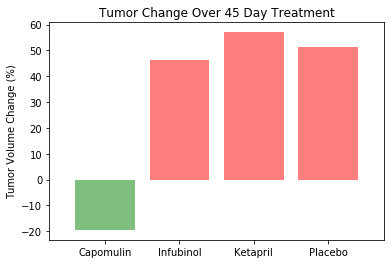

In [183]:
# Store all Relevant Percent Changes into a Tuple

Pct_change_tuple = (Capomulin_Tumor_Volume_Means_PctChange, Infubinol_Tumor_Volume_Means_PctChange, Ketapril_Tumor_Volume_Means_PctChange, Placebo_Tumor_Volume_Means_PctChange)
Pct_Change_Values = [-19.475303, 46.123472, 57.028795, 51.297960]
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
x_axis = np.arange(len(drugs))

plt.bar(x_axis, Pct_Change_Values, color=['green', 'red', 'red', 'red'], alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Infubinol", "Ketapril", "Placebo"])

plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("Tumor Volume Change (%)")

# Save the Figure
plt.savefig("tumor-change.png")

# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/change.png)